#  读取Excel文件
提前安装 `xlrd` 模块

In [1]:
import pandas as pd
!pip install xlrd

# sheet_name指定读取表单
df = pd.read_excel("jobs.xls",index_col=0)
df.head(3).T

Looking in indexes: https://mirror.baidu.com/pypi/simple/


id,1,2,3
positionID,1,2,3
positionName,python,python,Python开发工程师
longitude,113.264,113.264,113.264
latitude,23.1292,23.1292,23.1292
workYear,1-3年,3-5年,1-3年
education,本科,本科,本科
salary,10-15K,15-25K,15-25K
city,广州,广州,广州
jobNature,全职,全职,全职
financeStage,A轮,A轮,不需要融资


# 1. Python岗位数据基本统计分析

## 1.1 按照城市数量统计

In [2]:
# 筛选岗位为python的行
df1 = df[df["job"] == "python"]
# 统计城市数量
ss1 = df1["city"].value_counts()
ss1

北京      7341
上海      6391
深圳      5519
成都      4895
广州      3889
杭州      2417
长沙      1277
西安      1211
武汉      1014
南京       608
厦门       448
青岛       413
苏州       324
福州       272
重庆       234
郑州       200
天津       199
济南       161
昆明       152
中山       137
珠海       121
大连       100
合肥       100
佛山        95
宁波        69
绵阳        57
太原        52
湖州        49
宝鸡        44
东莞        42
        ... 
徐州        13
许昌        12
沈阳        12
南昌        12
南宁        11
无锡        11
潍坊         9
惠州         7
保定         7
梅州         5
香港         4
乌鲁木齐       4
西宁         4
澳门半岛       3
威海         3
泉州         2
义乌         2
海口         2
沧州         2
银川         2
海外         2
烟台         2
南通         1
开封         1
钦州         1
日照         1
辛安         1
贵港         1
盐城         1
台州         1
Name: city, Length: 70, dtype: int64

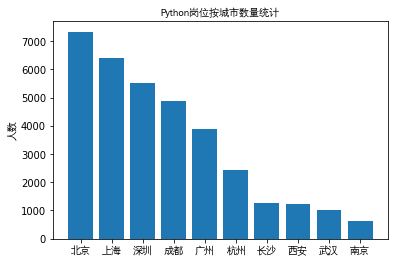

In [4]:
import matplotlib
from matplotlib import pyplot as plt

plt.bar(range(10), ss1[:10])
plt.title("Python岗位按城市数量统计", fontproperties=myfont)
plt.xticks(range(10), ss1[:10].index, fontproperties=myfont)
plt.ylabel("人数", fontproperties=myfont)
plt.show()

## 1.1 web可视化（pyecharts）
显示的HTML图需要进入项目以后才能看到，另外可以通过设置类型来调整点的显示效果。（悄咪咪地告诉你，涟漪特效很好看哦~）

![](https://ai-studio-static-online.cdn.bcebos.com/37d1b5dc72be4376b2d34ecf9a0fdf64c2abbf5b971148319c01933c63bb0393)

下面是代码部分

In [7]:
!pip install xlrd
from pyecharts import options as opts
from pyecharts.charts import Geo
from pyecharts.charts import Bar
import pandas as pd


df = pd.read_excel("jobs.xls")
ss = df["city"].value_counts()
# 删除特殊值
ss.drop("海外", inplace=True)
ss.drop("澳门特别行政区", inplace=True)
ss.drop("伊犁", inplace=True)
ss.drop("辛安", inplace=True)
# 转换成列表
cities = list(ss.index)
nums = list(ss.values/100)

c = (
    Geo()
    .add_schema(maptype="china", is_roam=False)
    .add("全国", [list(z) for z in zip(cities, nums)], type_="scatter", symbol_size=6)
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    .set_global_opts(
    visualmap_opts=opts.VisualMapOpts(is_piecewise=True, max_=130),
    title_opts=opts.TitleOpts(title="Python岗位按照城市数量统计(单位/百)")))

c.render_notebook()

Looking in indexes: https://mirror.baidu.com/pypi/simple/
     |████████████████████████████████| 112kB 18.3MB/s eta 0:00:01


/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/pyecharts/charts/chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


## 1.2 按照薪水范围数量统计

In [5]:
# 筛选岗位为python的行
df2 = df[df["job"] == "python"]
# 统计薪水范围
ss2 = df2["salary"].value_counts()
ss2

15-25K    14652
10-15K    11322
25K以上      6929
5-10K      4070
5K以下       1242
Name: salary, dtype: int64

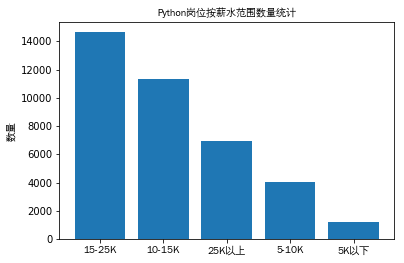

In [6]:
import matplotlib
from matplotlib import pyplot as plt
myfont = matplotlib.font_manager.FontProperties(
    fname='/usr/share/fonts/truetype/wqy/wqy-zenhei.ttc')

plt.bar(range(5), ss2)
plt.title("Python岗位按薪水范围数量统计", fontproperties=myfont)
plt.xticks(range(5), ss2.index, fontproperties=myfont)
plt.ylabel("数量", fontproperties=myfont)
plt.show()

## 1.3 按照行业领域数量统计

In [7]:
df3 = df[df["job"] == "python"]
ss3 = df3["industryField"].value_counts()
ss3

移动互联网        15145
企业服务          3624
数据服务          2655
金融            2449
电商            2124
信息安全          1950
文娱            1522
消费生活          1161
人工智能          1087
社交             958
游戏             900
教育             650
医疗             578
硬件             544
其他             544
通讯电子           497
软件开发           388
旅游             209
电子商务           165
物流             164
体育             154
工具             126
汽车             113
大数据             87
广告营销            81
房产家居            72
不限              62
区块链             56
电商、广告营销         53
物联网             40
企业服务、软件开发       13
金融、企业服务         11
数据服务、软件开发       10
物联网、软件开发         4
金融、软件开发          2
信息安全、数据服务        2
电商、社交            2
物联网、教育           2
企业服务、数据服务        1
消费生活、电商          1
电商、企业服务          1
数据服务、教育          1
社交、软件开发          1
硬件、通讯电子          1
信息安全、人工智能        1
金融、电商            1
人工智能、其他          1
软件开发、其他          1
软件开发、人工智能        1
Name: industryField, dtype: int64

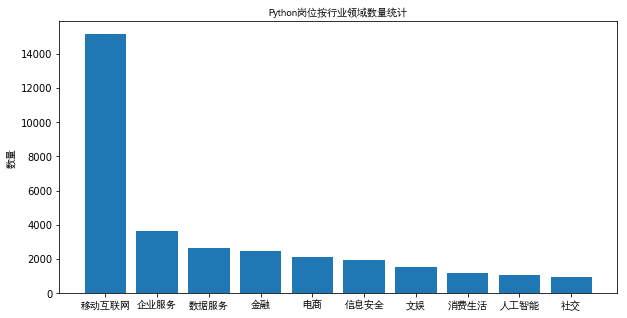

In [8]:
import matplotlib
from matplotlib import pyplot as plt
myfont = matplotlib.font_manager.FontProperties(
    fname='/usr/share/fonts/truetype/wqy/wqy-zenhei.ttc')

plt.figure(figsize=(10, 5))
plt.bar(range(10), ss3[:10], width=0.8)
plt.title("Python岗位按行业领域数量统计", fontproperties=myfont)
plt.xticks(range(10), ss3.index, fontproperties=myfont)
plt.ylabel("数量", fontproperties=myfont)
plt.show()

## 1.4 按照公司规模数量统计

In [9]:
df4 = df[df["job"] == "python"]
ss4 = df4["companySize"].value_counts()
ss4

 150-500人      9835
 50-150人       8433
 2000人以上       8064
 500-2000人     5926
 15-50人        4925
 少于15人         1017
 少于50人            9
 2000-5000人       3
5679              2
 1000-9999人       1
Name: companySize, dtype: int64

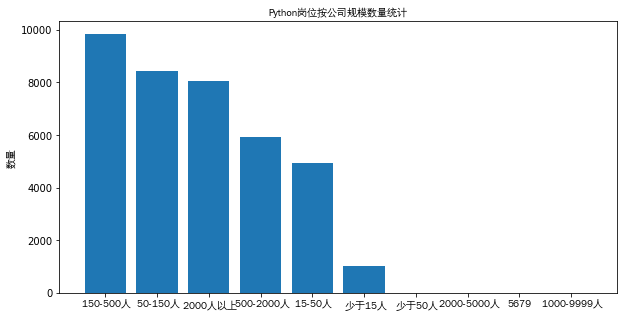

In [10]:
import matplotlib
from matplotlib import pyplot as plt
myfont = matplotlib.font_manager.FontProperties(
    fname='/usr/share/fonts/truetype/wqy/wqy-zenhei.ttc')

plt.figure(figsize=(10, 5))
plt.bar(range(10), ss4)
plt.title("Python岗位按公司规模数量统计", fontproperties=myfont)
plt.xticks(range(10), ss4.index, fontproperties=myfont)
plt.ylabel("数量", fontproperties=myfont)
plt.show()

## 1.5 按照学历数量统计

In [11]:
df5 = df[df["job"] == "python"]
ss5 = df5["education"].value_counts()
ss5

本科    31142
大专     3706
不限     2327
硕士     1009
博士       31
Name: education, dtype: int64

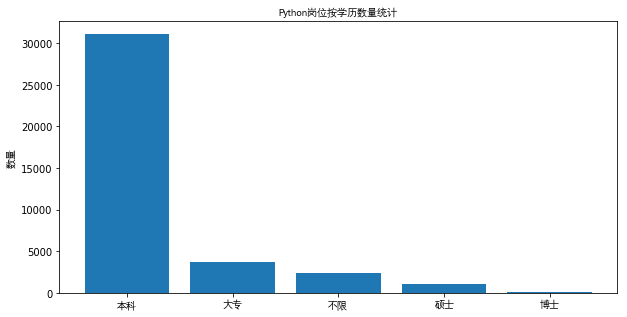

In [12]:
import matplotlib
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(range(5), ss5)
plt.title("Python岗位按学历数量统计", fontproperties=myfont)
plt.xticks(range(5), ss5.index, fontproperties=myfont)
plt.ylabel("数量", fontproperties=myfont)
plt.show()

## 1.6 按照工作年限数量统计

In [13]:
df6 = df[df["job"] == "python"]
ss6 = df6["workYear"].value_counts()
ss6

3-5年     18069
1-3年     10624
5-10年     3632
不限        2328
应届        2103
不限        1289
1年以下       105
10年以上       63
 不限          1
 应届          1
Name: workYear, dtype: int64

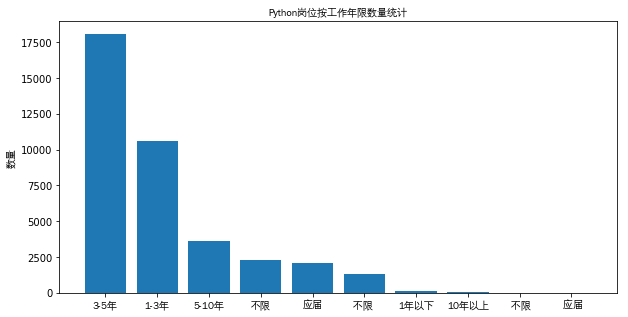

In [14]:
import matplotlib
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(range(10), ss6)
plt.title("Python岗位按工作年限数量统计", fontproperties=myfont)
plt.xticks(range(10), ss6.index, fontproperties=myfont)
plt.ylabel("数量", fontproperties=myfont)
plt.show()

# 2. Python岗位数据相关性分析
在该项目中，一个大任务下面可能有6~7个类似相关任务，其实我们不需要真的看完或者做完这么多。大部分题目的要求是类似的，这就有点像触类旁通，老师希望我们多接触这些题目来巩固自己的知识，殊不知 `Ctrl+C` `Ctrl+V` 大法的妙...

## 2.1 工作年限与工资薪水之间的相关关系

In [15]:
# 筛选job列为python的行
df1 = df[df["job"] == "python"]
# 筛选列为workYear和salary的Series
df1 = df1[["workYear", "salary"]]
# 统计
df1["workYear"].value_counts()

3-5年     18069
1-3年     10624
5-10年     3632
不限        2328
应届        2103
不限        1289
1年以下       105
10年以上       63
 不限          1
 应届          1
Name: workYear, dtype: int64

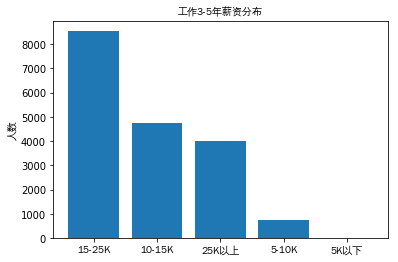

In [16]:
import matplotlib
from matplotlib import pyplot as plt

# 对workYear进行统计
df1_1 = df1[df1["workYear"] == "3-5年"]
ss1_1 = df1_1["salary"].value_counts()

plt.bar(range(5), ss1_1)
plt.title("工作3-5年薪资分布", fontproperties=myfont)
plt.xticks(range(5), ss1_1.index, fontproperties=myfont)
plt.ylabel("人数", fontproperties=myfont)
plt.show()

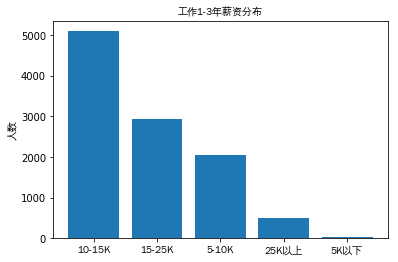

In [17]:
import matplotlib
from matplotlib import pyplot as plt

df1_2 = df1[df1["workYear"] == "1-3年"]
ss1_2 = df1_2["salary"].value_counts()

plt.bar(range(5), ss1_2)
plt.title("工作1-3年薪资分布", fontproperties=myfont)
plt.xticks(range(5), ss1_2.index, fontproperties=myfont)
plt.ylabel("人数", fontproperties=myfont)
plt.show()

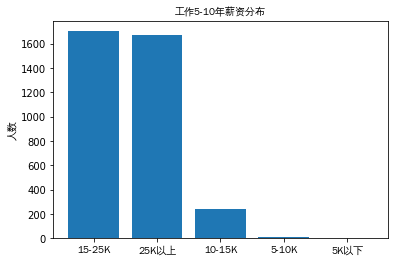

In [18]:
import matplotlib
from matplotlib import pyplot as plt


df1_3 = df1[df1["workYear"] == "5-10年"]
ss1_3 = df1_3["salary"].value_counts()

plt.bar(range(5), ss1_3)
plt.title("工作5-10年薪资分布", fontproperties=myfont)
plt.xticks(range(5), ss1_3.index, fontproperties=myfont)
plt.ylabel("人数", fontproperties=myfont)
plt.show()

## 2.2 学历要求与工资薪水之间的相关关系
学历对薪酬的影响大家可能比较关心，因此我把5个学历都绘制出来

In [19]:
df2 = df[df["job"] == "python"]
df2 = df2[["education", "salary"]]
df2["education"].value_counts()

本科    31142
大专     3706
不限     2327
硕士     1009
博士       31
Name: education, dtype: int64

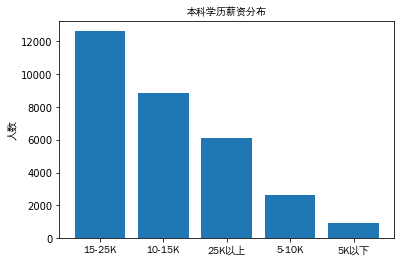

In [20]:
import matplotlib
from matplotlib import pyplot as plt

df2_1 = df2[df2["education"] == "本科"]
ss2_1 = df2_1["salary"].value_counts()

plt.bar(range(5), ss2_1)
plt.title("本科学历薪资分布", fontproperties=myfont)
plt.xticks(range(5), ss2_1.index, fontproperties=myfont)
plt.ylabel("人数", fontproperties=myfont)
plt.show()

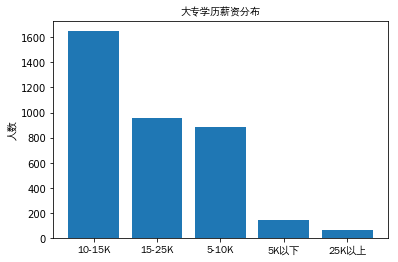

In [21]:
import matplotlib
from matplotlib import pyplot as plt

df2_2 = df2[df2["education"] == "大专"]
ss2_2 = df2_2["salary"].value_counts()

plt.bar(range(5), ss2_2)
plt.title("大专学历薪资分布", fontproperties=myfont)
plt.xticks(range(5), ss2_2.index, fontproperties=myfont)
plt.ylabel("人数", fontproperties=myfont)
plt.show()

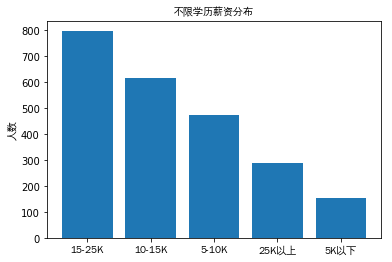

In [22]:
import matplotlib
from matplotlib import pyplot as plt

df2_3 = df2[df2["education"] == "不限"]
ss2_3 = df2_3["salary"].value_counts()

plt.bar(range(5), ss2_3)
plt.title("不限学历薪资分布", fontproperties=myfont)
plt.xticks(range(5), ss2_3.index, fontproperties=myfont)
plt.ylabel("人数", fontproperties=myfont)
plt.show()

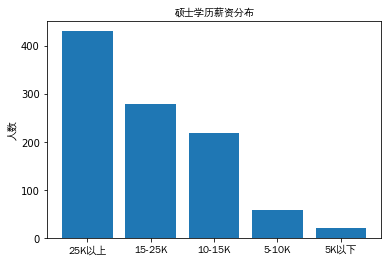

In [23]:
import matplotlib
from matplotlib import pyplot as plt

df2_4 = df2[df2["education"] == "硕士"]
ss2_4 = df2_4["salary"].value_counts()

plt.bar(range(5), ss2_4)
plt.title("硕士学历薪资分布", fontproperties=myfont)
plt.xticks(range(5), ss2_4.index, fontproperties=myfont)
plt.ylabel("人数", fontproperties=myfont)
plt.show()

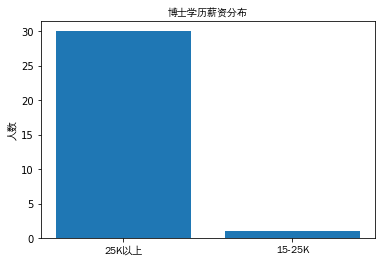

In [24]:
import matplotlib
from matplotlib import pyplot as plt


df2_5 = df2[df2["education"] == "博士"]
ss2_5 = df2_5["salary"].value_counts()

plt.bar(range(2), ss2_5)
plt.title("博士学历薪资分布", fontproperties=myfont)
plt.xticks(range(2), ss2_5.index, fontproperties=myfont)
plt.ylabel("人数", fontproperties=myfont)
plt.show()

## 2.3 公司规模与工资薪水之间的相关关系
公司规模有很多values比较奇怪，两边可能会有空格，需要格外留意

In [25]:
df3 = df[df["job"] == "python"]
df3 = df3[["companySize", "salary"]]
df3["companySize"].value_counts()

 150-500人      9835
 50-150人       8433
 2000人以上       8064
 500-2000人     5926
 15-50人        4925
 少于15人         1017
 少于50人            9
 2000-5000人       3
5679              2
 1000-9999人       1
Name: companySize, dtype: int64

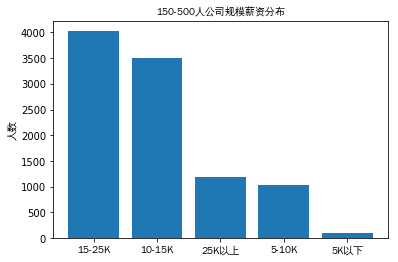

In [26]:
import matplotlib
from matplotlib import pyplot as plt

# companySize的值前面有一个空格
df3_1 = df3[df3["companySize"] == " 150-500人"]
ss3_1 = df3_1["salary"].value_counts()
plt.bar(range(5), ss3_1)
plt.title("150-500人公司规模薪资分布", fontproperties=myfont)
plt.xticks(range(5), ss3_1.index, fontproperties=myfont)
plt.ylabel("人数", fontproperties=myfont)
plt.show()

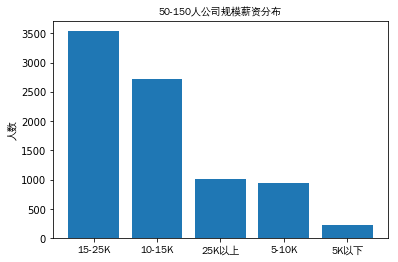

In [27]:
import matplotlib
from matplotlib import pyplot as plt

df3_2 = df3[df3["companySize"] == " 50-150人"]
ss3_2 = df3_2["salary"].value_counts()
plt.bar(range(5), ss3_2)
plt.title("50-150人公司规模薪资分布", fontproperties=myfont)
plt.xticks(range(5), ss3_2.index, fontproperties=myfont)
plt.ylabel("人数", fontproperties=myfont)
plt.show()

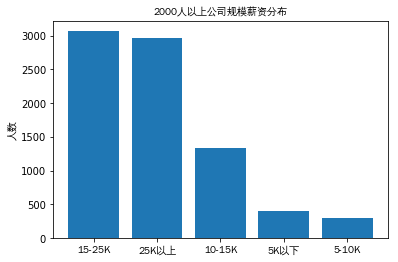

In [28]:
import matplotlib
from matplotlib import pyplot as plt

df3_3 = df3[df3["companySize"] == " 2000人以上"]
ss3_3 = df3_3["salary"].value_counts()
plt.bar(range(5), ss3_3)
plt.title("2000人以上公司规模薪资分布", fontproperties=myfont)
plt.xticks(range(5), ss3_3.index, fontproperties=myfont)
plt.ylabel("人数", fontproperties=myfont)
plt.show()

## 2.4 行业领域与工资薪水之间的相关关系

In [29]:
df4 = df[df["job"] == "python"]
df4 = df4[["industryField", "salary"]]
df4["industryField"].value_counts()

移动互联网        15145
企业服务          3624
数据服务          2655
金融            2449
电商            2124
信息安全          1950
文娱            1522
消费生活          1161
人工智能          1087
社交             958
游戏             900
教育             650
医疗             578
硬件             544
其他             544
通讯电子           497
软件开发           388
旅游             209
电子商务           165
物流             164
体育             154
工具             126
汽车             113
大数据             87
广告营销            81
房产家居            72
不限              62
区块链             56
电商、广告营销         53
物联网             40
企业服务、软件开发       13
金融、企业服务         11
数据服务、软件开发       10
物联网、软件开发         4
金融、软件开发          2
信息安全、数据服务        2
电商、社交            2
物联网、教育           2
企业服务、数据服务        1
消费生活、电商          1
电商、企业服务          1
数据服务、教育          1
社交、软件开发          1
硬件、通讯电子          1
信息安全、人工智能        1
金融、电商            1
人工智能、其他          1
软件开发、其他          1
软件开发、人工智能        1
Name: industryField, dtype: int64

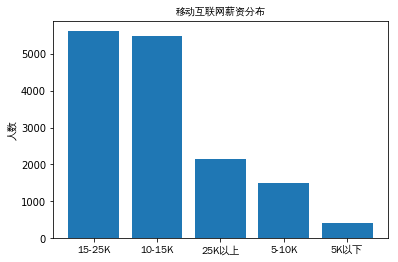

In [32]:
import matplotlib
from matplotlib import pyplot as plt


df4_1 = df4[df4["industryField"] == "移动互联网"]
ss4_1 = df4_1["salary"].value_counts()
plt.bar(range(5), ss4_1)
plt.title("移动互联网薪资分布", fontproperties=myfont)
plt.xticks(range(5), ss4_1.index, fontproperties=myfont)
plt.ylabel("人数", fontproperties=myfont)
plt.show()

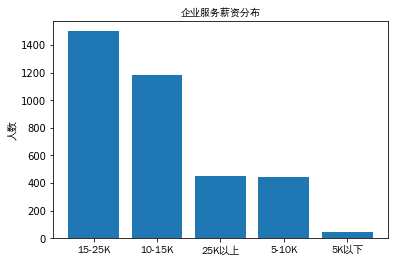

In [34]:
import matplotlib
from matplotlib import pyplot as plt

df4_2 = df4[df4["industryField"] == "企业服务"]
ss4_2 = df4_2["salary"].value_counts()
plt.bar(range(5), ss4_2)
plt.title("企业服务薪资分布", fontproperties=myfont)
plt.xticks(range(5), ss4_2.index, fontproperties=myfont)
plt.ylabel("人数", fontproperties=myfont)
plt.show()

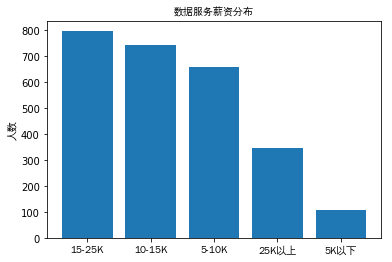

In [35]:
import matplotlib
from matplotlib import pyplot as plt

df4_3 = df4[df4["industryField"] == "数据服务"]
ss4_3 = df4_3["salary"].value_counts()
plt.bar(range(5), ss4_3)
plt.title("数据服务薪资分布", fontproperties=myfont)
plt.xticks(range(5), ss4_3.index, fontproperties=myfont)
plt.ylabel("人数", fontproperties=myfont)
plt.show()

## 2.5 城市与工资薪水之间的相关关系

In [36]:
df5 = df[df["job"] == "python"]
df5 = df5[["city", "salary"]]
df5["city"].value_counts()

北京      7341
上海      6391
深圳      5519
成都      4895
广州      3889
杭州      2417
长沙      1277
西安      1211
武汉      1014
南京       608
厦门       448
青岛       413
苏州       324
福州       272
重庆       234
郑州       200
天津       199
济南       161
昆明       152
中山       137
珠海       121
大连       100
合肥       100
佛山        95
宁波        69
绵阳        57
太原        52
湖州        49
宝鸡        44
东莞        42
        ... 
徐州        13
许昌        12
沈阳        12
南昌        12
南宁        11
无锡        11
潍坊         9
惠州         7
保定         7
梅州         5
香港         4
乌鲁木齐       4
西宁         4
澳门半岛       3
威海         3
泉州         2
义乌         2
海口         2
沧州         2
银川         2
海外         2
烟台         2
南通         1
开封         1
钦州         1
日照         1
辛安         1
贵港         1
盐城         1
台州         1
Name: city, Length: 70, dtype: int64

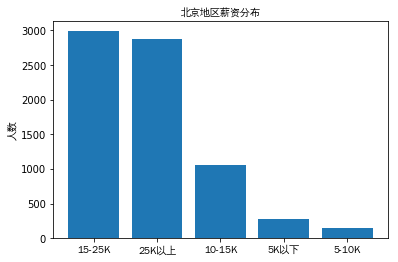

In [37]:
import matplotlib
from matplotlib import pyplot as plt

df5_1 = df5[df5["city"] == "北京"]
ss5_1 = df5_1["salary"].value_counts()
plt.bar(range(5), ss5_1)
plt.title("北京地区薪资分布", fontproperties=myfont)
plt.xticks(range(5), ss5_1.index, fontproperties=myfont)
plt.ylabel("人数", fontproperties=myfont)
plt.show()

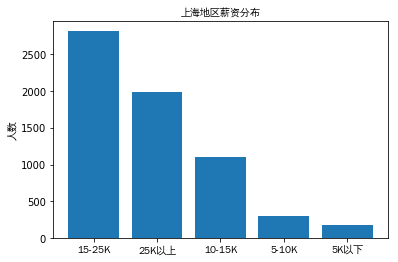

In [38]:
import matplotlib
from matplotlib import pyplot as plt

df5_2 = df5[df5["city"] == "上海"]
ss5_2 = df5_2["salary"].value_counts()
plt.bar(range(5), ss5_2)
plt.title("上海地区薪资分布", fontproperties=myfont)
plt.xticks(range(5), ss5_2.index, fontproperties=myfont)
plt.ylabel("人数", fontproperties=myfont)
plt.show()

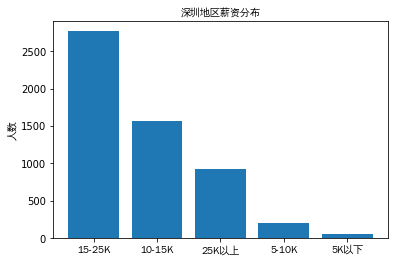

In [39]:
import matplotlib
from matplotlib import pyplot as plt

df5_3 = df5[df5["city"] == "深圳"]
ss5_3 = df5_3["salary"].value_counts()
plt.bar(range(5), ss5_3)
plt.title("深圳地区薪资分布", fontproperties=myfont)
plt.xticks(range(5), ss5_3.index, fontproperties=myfont)
plt.ylabel("人数", fontproperties=myfont)
plt.show()

## 2.6 Python公司融资轮数与工资薪水之间的相关关系

In [40]:
df6 = df[df["job"] == "python"]
df6 = df6[["financeStage", "salary"]]
df6["financeStage"].value_counts()

 不需要融资     10952
 上市公司       7819
 A轮         5673
 B轮         4061
 未融资        3965
 C轮         2671
 天使轮        1739
 D轮及以上      1335
Name: financeStage, dtype: int64

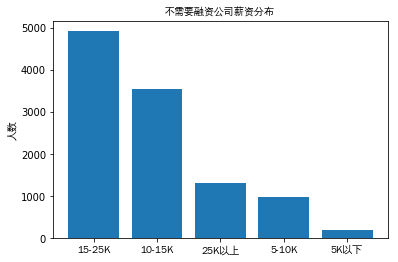

In [41]:
import matplotlib
from matplotlib import pyplot as plt

df6_1 = df6[df6["financeStage"] == " 不需要融资 "]
ss6_1 = df6_1["salary"].value_counts()
plt.bar(range(5), ss6_1)
plt.title("不需要融资公司薪资分布", fontproperties=myfont)
plt.xticks(range(5), ss6_1.index, fontproperties=myfont)
plt.ylabel("人数", fontproperties=myfont)
plt.show()

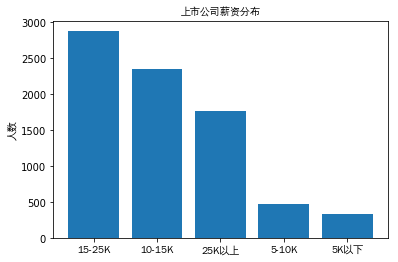

In [42]:
import matplotlib
from matplotlib import pyplot as plt

df6_2 = df6[df6["financeStage"] == " 上市公司 "]
ss6_2 = df6_2["salary"].value_counts()
plt.bar(range(5), ss6_2)
plt.title("上市公司薪资分布", fontproperties=myfont)
plt.xticks(range(5), ss6_2.index, fontproperties=myfont)
plt.ylabel("人数", fontproperties=myfont)
plt.show()

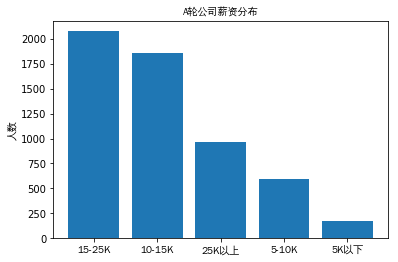

In [43]:
import matplotlib
from matplotlib import pyplot as plt

df6_3 = df6[df6["financeStage"] == " A轮 "]
ss6_3 = df6_3["salary"].value_counts()
plt.bar(range(5), ss6_3)
plt.title("A轮公司薪资分布", fontproperties=myfont)
plt.xticks(range(5), ss6_3.index, fontproperties=myfont)
plt.ylabel("人数", fontproperties=myfont)
plt.show()

收获
1. 很多列的值会检索不到，因为有的中文左边、或者两边会有空格。比如 `df6[df["financeStage"] == "不需要融资"]`会显示空的DataFrame，但`df6[df["financeStage"] == " 不需要融资 "]` 会正确显示；
2. pyecharts库有着matplotlib许多类似的功能——柱状图、饼图、折线图、雷达图等，但显示的效果比matplotlib要好很多。